In [1]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_default_plt_colors():
    return plt.rcParams['axes.prop_cycle'].by_key()['color']

In [12]:
# set configurations for number of samples
sample_size = 100
nr_sample_sets = 20
num_steps = 2
x_b = np.linspace(0.1,1,num_steps)
test_size = 0.2
n_folds = 5

### Bounded distributions

In [13]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [11]:
np.linspace(0.01,1,2)

array([0.01, 1.  ])

In [14]:
edf_df = dem.get_edf(bounded_samples, x_b)
edf_df

,0,1,label
0,0.23,1.0,beta_1_2
1,0.21,1.0,beta_1_2
2,0.16,1.0,beta_1_2
3,0.21,1.0,beta_1_2
4,0.20,1.0,beta_1_2
...,...,...,...
75,0.36,1.0,beta_1_5
76,0.44,1.0,beta_1_5
77,0.47,1.0,beta_1_5
78,0.42,1.0,beta_1_5


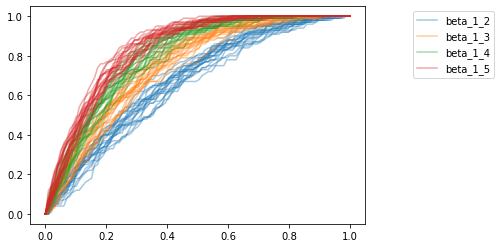

In [7]:
dem.get_edf_plot(edf_df, x_b)

# figures for report

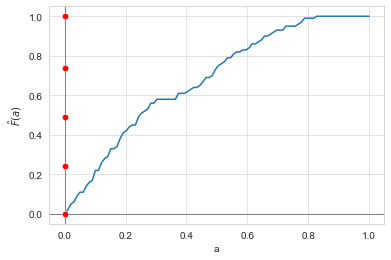

In [41]:
a = edf_df.iloc[1]
y = list(a[:-1])
x = np.linspace(0,1,num_steps)
#fig, ax = plt.subplots()
sns.set_style("whitegrid",{'grid.color':'#DDDDDD'})
ax=sns.lineplot(x=x, y=y)
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
#sns.scatterplot(x=[x[13]], y=0, color='black', s=40, zorder=10)
sns.scatterplot(x=[x[0]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[x[0]], y=0.24, color='red', s=40, zorder=10)
sns.scatterplot(x=[x[0]], y=0.49, color='red', s=40, zorder=10)
sns.scatterplot(x=[x[0]], y=0.74, color='red', s=40, zorder=10)
sns.scatterplot(x=[x[0]], y=1, color='red', s=40, zorder=10)
ax.set_xlabel('a')
ax.set_ylabel(r'$\hat{F}(a)$')
plt.show()

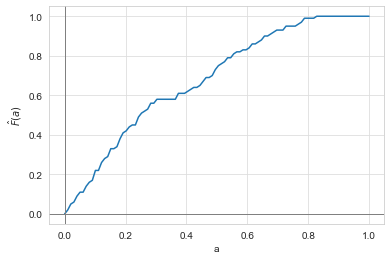

In [42]:
a = edf_df.iloc[1]
y = list(a[:-1])
x = np.linspace(0,1,num_steps)
#fig, ax = plt.subplots()
sns.set_style("whitegrid",{'grid.color':'#DDDDDD'})
ax=sns.lineplot(x=x, y=y)
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
ax.set_xlabel('a')
ax.set_ylabel(r'$\hat{F}(a)$')
plt.show()

In [33]:
x_b = np.linspace(0,1,num_steps)
kde_df = dem.get_kde(bounded_samples, x_b)

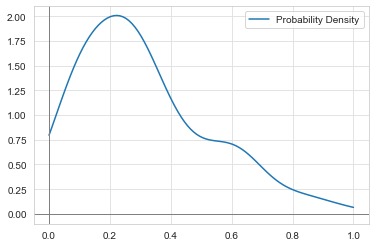

In [35]:
a = kde_df.iloc[2]
y = list(a[:-1])
x = list(np.linspace(0,1,100))
#fig, ax = plt.subplots()
sns.set_style("whitegrid",{'grid.color':'#DDDDDD'})
ax=sns.lineplot(x=x, y=y, label='Probability Density')
highlight_index = 50  # Index of the point to highlight
highlight_x = x[highlight_index]
highlight_y = y[highlight_index]
#plt.fill_between(x,y,0, color='lightblue')

ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
ax.set_ylim(-0.1,2.1)
plt.show()

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [62]:
y = np.linspace(0.01,1,1)
edf_df = dem.get_edf_v2(bounded_samples, y)
edf_df.head(3)

,0,label
0,0.000038,arcsine
1,0.000528,arcsine
2,0.000210,arcsine


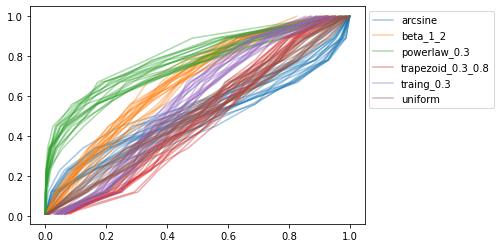

In [35]:
get_edf_plot_v2(edf_df,y)

In [25]:
def get_edf_v2(df, y):
    # df: a dataframe containing samples from different distribution
    # y:
    x = list()  # empty list to store cumulative probability
    for i in range(len(df)):
        ecdf = ECDF(df.iloc[i,:-1])
        inverse_ecdf = interp1d(ecdf.y, ecdf.x)
        x.append(inverse_ecdf(y))

    edf_df = pd.DataFrame(x)
    edf_df['label'] = df.iloc[:,-1].tolist()
    return edf_df 

In [11]:
def get_edf_plot_v2(df, y):
    names = df.iloc[:,-1].unique()
    fig, ax = plt.subplots()
    colors = get_default_plt_colors()
    handles = []
    
    for name, color in zip(names, colors):  # iterate over each distribution
        temp = df.loc[df.iloc[:,-1] == name].iloc[:, :-1].to_numpy()
        hh = ax.plot(temp.T, y, c=color, alpha=0.4, label=name)
        handles.append(hh[0] if isinstance(hh, list) else hh)
    ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.4, 1))

### SVM

In [7]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = list(np.arange(2,21))

In [8]:
cost = [0.01,0.1, 0.5, 1, 5, 10]
gamma = [0.01, 0.1, 1, 5, 10]

In [9]:
res_svm = cm.cv_numsteps_samplesize_svm(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, 'edf', cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

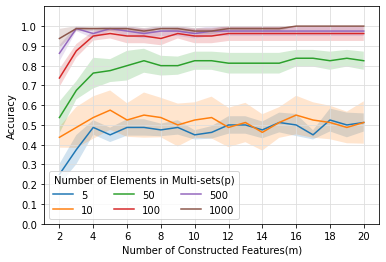

In [10]:
cm.plot_cv_numsteps_samplesize_v2(res_svm)

### Logistic Regression

In [12]:
C = [0.01, 0.1, 0.5, 1, 5, 10]

In [13]:
res_lr = cm.cv_numsteps_samplesize_lr(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, 'edf', C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

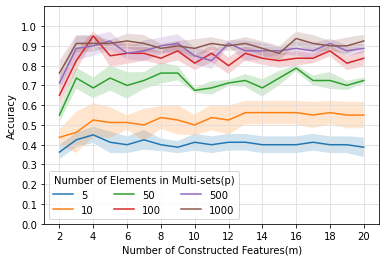

In [14]:
cm.plot_cv_numsteps_samplesize_v2(res_lr)

## Varying number of elements

### svm

In [15]:
res_flex_svm = cm.cv_numsteps_samplesize_svm(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, 'edf', cost, gamma, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

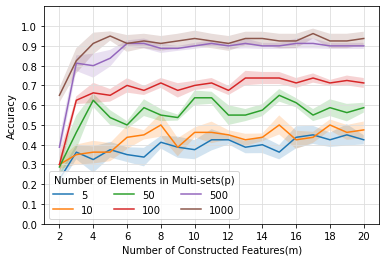

In [17]:
cm.plot_cv_numsteps_samplesize_v2(res_flex_svm)

### logistic regression

In [16]:
res_flex_lr = cm.cv_numsteps_samplesize_lr(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, 'edf', C, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

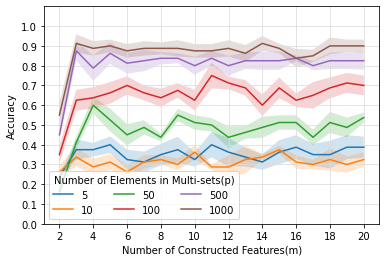

In [18]:
cm.plot_cv_numsteps_samplesize_v2(res_flex_lr)

### Heavytail distributions

In [19]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [20]:
perc_95 = np.percentile(heavytail_samples.iloc[:,:-1],95)
x_h = np.linspace(0,perc_95,num_steps)
edf_df = dem.get_edf(heavytail_samples, x_h)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.0,0.08,0.13,0.17,0.22,0.30,0.39,0.42,0.47,0.49,...,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,half_cauchy
1,0.0,0.08,0.17,0.26,0.31,0.34,0.38,0.41,0.45,0.51,...,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,half_cauchy
2,0.0,0.08,0.15,0.19,0.21,0.31,0.35,0.45,0.47,0.49,...,0.93,0.93,0.93,0.93,0.93,0.93,0.93,0.94,0.94,half_cauchy


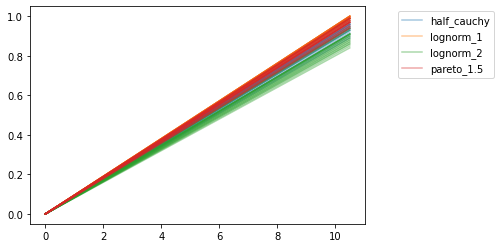

In [20]:
dem.get_edf_plot(edf_df, x_h)

In [22]:
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size, transform=True)

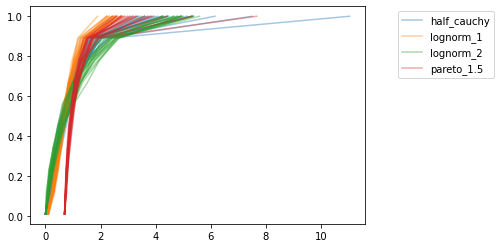

In [23]:
y = np.linspace(0.01,1,10)
edf_df = dem.get_edf_v2(heavytail_samples, y)
dem.get_edf_plot_v2(edf_df, y)

### SVM

In [24]:
res_ht_svm = cm.cv_numsteps_samplesize_svm(sample_size_list, num_steps_list, heavytail_dists, nr_sample_sets, n_folds, test_size, 'edf', cost, gamma, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

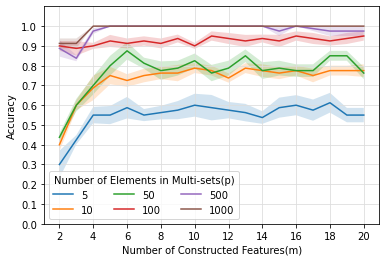

In [26]:
cm.plot_cv_numsteps_samplesize_v2(res_ht_svm)

In [34]:
res_ht_svm = cm.cv_numsteps_samplesize_svm(sample_size_list, num_steps_list, heavytail_dists, nr_sample_sets, n_folds, test_size, 'edf', cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

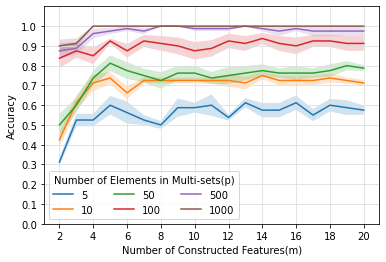

In [35]:
cm.plot_cv_numsteps_samplesize_v2(res_ht_svm)

### Logistic Regression

In [25]:
res_ht_lr = cm.cv_numsteps_samplesize_lr(sample_size_list, num_steps_list, heavytail_dists, nr_sample_sets, n_folds, test_size, 'edf', C, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

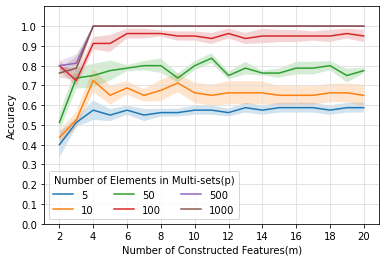

In [27]:
cm.plot_cv_numsteps_samplesize_v2(res_ht_lr)

## Multi Modal

In [28]:
nr_modes = 5
nr_sample_sets = 20
nr_mm_dist = 10
sample_size=50

In [29]:
mm_df= dm.get_multimodal_dists(nr_mm_dist, nr_sample_sets, nr_modes, sample_size)
moments_df = dem.get_moments(mm_df, 10)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,label
0,6.060268,5.831797,-5.576391,83.393139,-191.045680,1586.578128,-5445.438757,34809.552550,-144848.593824,818633.035219,Dist 01
1,5.949579,6.038960,-5.713005,88.506293,-179.936530,1635.620896,-4789.516068,33817.514988,-120438.270463,741080.022193,Dist 01
2,6.009530,6.147287,-4.187070,86.943478,-126.470382,1561.685157,-3403.697629,31846.363881,-88714.159573,698906.546879,Dist 01


### svm

In [30]:
res_mm_svm= cm.cv_numsteps_samplesize_svm_mm(sample_size_list, num_steps_list, nr_sample_sets, nr_mm_dist, nr_modes, n_folds, test_size, 'edf', cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

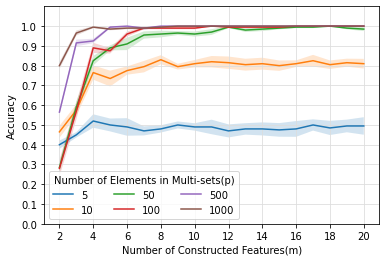

In [31]:
cm.plot_cv_numsteps_samplesize_v2(res_mm_svm)

### logistic regression

In [32]:
res_mm_lr = cm.cv_numsteps_samplesize_lr_mm(sample_size_list, num_steps_list, nr_sample_sets, nr_mm_dist, nr_modes, n_folds, test_size, 'edf', C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

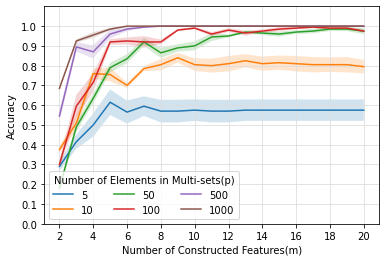

In [33]:
cm.plot_cv_numsteps_samplesize_v2(res_mm_lr)

In [38]:
res_svm.to_csv('results/edf/res_svm_bounded.csv')
res_flex_svm.to_csv('results/edf/res_svm_bounded_flex.csv')
res_ht_svm.to_csv('results/edf/res_svm_ht.csv')
res_mm_svm.to_csv('results/edf/res_svm_multi_modal.csv')

res_lr.to_csv('results/edf/res_lr_bounded.csv')
res_flex_lr.to_csv('results/edf/res_lr_bounded_flex.csv')
res_ht_lr.to_csv('results/edf/res_lr_heavytail.csv')
res_mm_lr.to_csv('results/edf/res_lr_multi_modal.csv')